# 三次内插值

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [2]:
src = cv2.imread('../datas/f2.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
rgb_f = rgb.astype(np.float32)

In [4]:
def getBicPixelChannel(img,x,y,channel):
    if (x < img.shape[1]) and (y < img.shape[0]):
        return np.array(img[y,x]) & 0xFF
    return 0

In [9]:
def bicubic(img, rate):
	new_w = int(math.ceil(float(img.shape[1]) * rate))
	new_h = int(math.ceil(float(img.shape[0]) * rate))

	new_img = np.zeros((new_w, new_h, 3), np.uint8)

	x_rate = float(img.shape[1]) / new_img.shape[1]
	y_rate = float(img.shape[0]) / new_img.shape[0]

	C = np.zeros(5)

	for hi in range(new_img.shape[0]):
	    for wi in range(new_img.shape[1]):

	        x_int = int(wi * x_rate)
	        y_int = int(hi * y_rate)

	        dx = x_rate * wi - x_int
	        dy = y_rate * hi - y_int

	        for channel in range(1):
	            for jj in range(0,4):
	                o_y = y_int - 1 + jj
	                a0 = getBicPixelChannel(img, x_int, o_y, channel) 
	                d0 = getBicPixelChannel(img, x_int - 1, o_y, channel) - a0
	                d2 = getBicPixelChannel(img, x_int + 1, o_y, channel) - a0
	                d3 = getBicPixelChannel(img, x_int + 2, o_y, channel) - a0

	                a1 = -1./3 * d0 + d2 - 1./6 * d3
	                a2 = 1./2 * d0 + 1./2 * d2
	                a3 = -1./6 * d0 - 1./2 * d2 + 1./6 * d3
	                C[jj] = a0 + a1 * dx + a2 * dx * dx + a3 * dx * dx * dx

	            d0 = C[0] - C[1]
	            d2 = C[2] - C[1]
	            d3 = C[3] - C[1]
	            a0 = C[1]
	            a1 = -1. / 3 * d0 + d2 - 1. / 6 * d3
	            a2 = 1. / 2 * d0 + 1. / 2 * d2
	            a3 = -1. / 6 * d0 - 1. / 2 * d2 + 1. / 6 * d3
	            new_img[hi, wi] = a0 + a1 * dy + a2 * dy * dy + a3 * dy * dy * dy

	#return new_img
	return cv2.medianBlur(new_img, 3)

In [10]:
dst = bicubic(rgb,2)

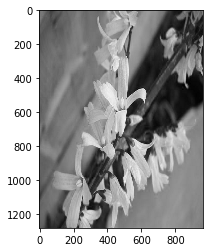

In [11]:
plt.imshow(dst)